<h1>1. Loading Dendenciec

In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
from collections import Counter



2023-06-13 11:14:10.477995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 11:14:11.125377: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:

print(f'\nTensorflow version = {tf.__version__}\n')
print(f'\n{tf.config.list_physical_devices("GPU")}\n')


Tensorflow version = 2.12.0


[]



2023-06-13 11:14:13.003648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-13 11:14:13.060524: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<h1>2. Build Data loading Functions

<h4>2.1 Define Paths to File

In [4]:
file = os.path.join('YANDEX_DATASET', 'speech_commands_train', 'вверх', '0a0f8b19ae1aa9e8e3fa3181fd58b675.wav')
file_noize = os.path.join('YANDEX_DATASET', 'speech_commands_train', 'noises', '0a6861c7-5c2e-4ece-952f-5db0fc1eb359.wav')


<h4>2.2 Build dataloading function

In [5]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

<h4> 2.3 Plot Wave

2023-06-13 11:14:22.573854: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


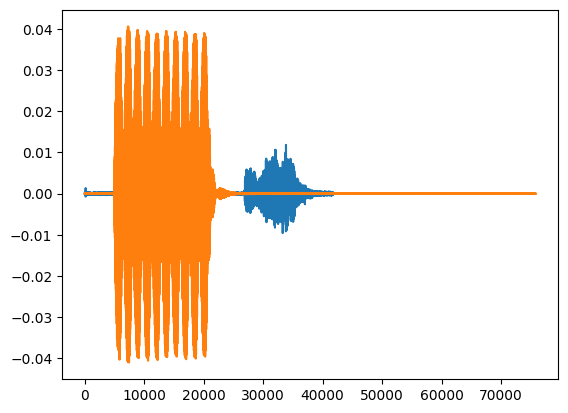

In [6]:
wave = load_wav_16k_mono(file)
nwave = load_wav_16k_mono(file_noize)
plt.plot(wave)
plt.plot(nwave)
plt.show()

<h2> 3. Create Tensorflow dataset

<h4> 3.1 Difine path

In [7]:
POS_UP = os.path.join('YANDEX_DATASET', 'speech_commands_train', 'вверх')
NEG= os.path.join('YANDEX_DATASET','speech_commands_train', 'noises')


<h4> 3.2 Create Tensorflow Datasets

In [8]:
files_positive_up = tf.data.Dataset.list_files(POS_UP+'/*.wav')
files_nagative = tf.data.Dataset.list_files(NEG+'/*.wav')



In [9]:
len(files_positive_up)
len(files_nagative)

719

<h4>3.3 Add labels and Combine Positive and Negative Samples

In [10]:
positives = tf.data.Dataset.zip((files_positive_up, tf.data.Dataset.from_tensor_slices(tf.ones(len(files_positive_up)))))
negatives = tf.data.Dataset.zip((files_nagative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(files_nagative)))))
data = positives.concatenate(negatives)

In [11]:
negatives.as_numpy_iterator().next()

2023-06-13 11:14:31.292894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [719]
	 [[{{node Placeholder/_7}}]]
2023-06-13 11:14:31.293173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [719]
	 [[{{node Placeholder/_7}}]]


(b'YANDEX_DATASET/speech_commands_train/noises/02475acc-c7ec-4e02-804b-1339798cbe90.wav',
 0.0)

<h2> 4. Determine Average Length

<h4>4.1 Calculate Wave Cycle Length

In [13]:
lengths = []
for file in os.listdir(os.path.join('YANDEX_DATASET', 'to_learn','to_learn_2','up_to_learn')):
    #/home/nick/Рабочий стол/python-diploma/ASR_Diplom/YANDEX_DATASET/to_learn/to_learn_2/up_to_learn
    tensor_wave = load_wav_16k_mono(os.path.join('YANDEX_DATASET', 'to_learn','to_learn_2','up_to_learn', file))
    lengths.append(len(tensor_wave))

In [14]:
lengths

[64000,
 47745,
 46733,
 45739,
 45459,
 50044,
 40001,
 40391,
 49001,
 57000,
 53554,
 40132,
 64000,
 44651,
 40001,
 52874,
 50854,
 40031,
 40001,
 64000,
 49776,
 43256,
 40002,
 40956,
 43187,
 40001,
 40014,
 62968,
 53464,
 61015,
 42096,
 56005,
 64000,
 40001,
 46926,
 40572,
 47325,
 40077,
 51020,
 44392,
 63947,
 40017,
 52126,
 40303,
 40013,
 40021,
 40057,
 61800,
 40001,
 58326,
 64000,
 40010,
 40001,
 62130,
 40004,
 43113,
 43935,
 44114,
 44534,
 55296,
 55823,
 59082,
 43958,
 48601,
 40001,
 58325,
 41713,
 46090,
 40439,
 58421,
 51777,
 49020,
 40173,
 46121,
 40001,
 56846,
 40249,
 40660,
 41742,
 60416,
 64000,
 64000,
 40001,
 43845,
 40001,
 40382,
 41723,
 59392,
 40028,
 48254,
 64000,
 40016,
 40443,
 40878,
 62887,
 44296,
 44046,
 64000,
 47349,
 40407,
 40017,
 46045,
 52800,
 45860,
 64000,
 40889,
 40007,
 64000,
 45746,
 40074,
 47375,
 40955,
 40001,
 49361,
 64000,
 44194,
 50349,
 56203,
 43775,
 49581,
 64000,
 40703,
 42148,
 64000,
 52253,


<h4>4.2 Calculate Mean, Min and Max

<h5>4.2.2 Make plot of lengths

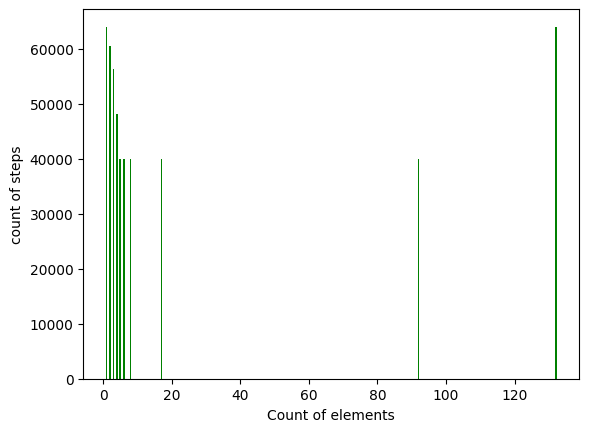

{64000: 132,
 47745: 1,
 46733: 1,
 45739: 1,
 45459: 1,
 50044: 2,
 40001: 92,
 40391: 2,
 49001: 1,
 57000: 1,
 53554: 1,
 40132: 2,
 44651: 1,
 52874: 1,
 50854: 1,
 40031: 2,
 49776: 1,
 43256: 1,
 40002: 17,
 40956: 1,
 43187: 1,
 40014: 2,
 62968: 1,
 53464: 1,
 61015: 1,
 42096: 1,
 56005: 1,
 46926: 1,
 40572: 1,
 47325: 1,
 40077: 1,
 51020: 1,
 44392: 1,
 63947: 1,
 40017: 2,
 52126: 1,
 40303: 2,
 40013: 5,
 40021: 1,
 40057: 1,
 61800: 1,
 58326: 1,
 40010: 6,
 62130: 1,
 40004: 6,
 43113: 1,
 43935: 1,
 44114: 1,
 44534: 1,
 55296: 1,
 55823: 1,
 59082: 1,
 43958: 1,
 48601: 1,
 58325: 1,
 41713: 1,
 46090: 1,
 40439: 1,
 58421: 1,
 51777: 1,
 49020: 1,
 40173: 1,
 46121: 1,
 56846: 1,
 40249: 1,
 40660: 1,
 41742: 1,
 60416: 2,
 43845: 1,
 40382: 1,
 41723: 1,
 59392: 1,
 40028: 2,
 48254: 1,
 40016: 3,
 40443: 1,
 40878: 1,
 62887: 1,
 44296: 1,
 44046: 1,
 47349: 1,
 40407: 1,
 46045: 2,
 52800: 1,
 45860: 1,
 40889: 1,
 40007: 6,
 45746: 1,
 40074: 1,
 47375: 1,
 40955

In [15]:
collections_of_lengths = Counter(lengths)
collections_of_lengths = dict(collections_of_lengths)
plt.bar(list(collections_of_lengths.values()), \
        list(collections_of_lengths.keys()), width=0.5, color='g')
plt.xlabel('Count of elements')
plt.ylabel('count of steps')
plt.show()

collections_of_lengths

In [16]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=48368>

In [18]:
48368/16000

3.023

In [19]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=40001>

In [20]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=64000>

<h2> 5. Build Preprocessing Function to Convert to Spectrogram

<h4> 5.1 Build Preprocessing Function

In [36]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [50]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

2023-05-18 04:50:31.417246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2497]
	 [[{{node Placeholder/_0}}]]
2023-05-18 04:50:31.417457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [2497]
	 [[{{node Placeholder/_7}}]]


In [51]:
spectrogram, label = preprocess(filepath, label)
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[4.04789578e-04],
        [3.07437149e-04],
        [1.76952613e-04],
        ...,
        [7.35251717e-07],
        [1.77649667e-06],
        [1.15309376e-07]],

       [[3.36376310e-04],
        [3.33203701e-04],
        [1.45804559e-04],
        ...,
        [3.16301089e-06],
        [3.19569995e-06],
        [2.78052175e-06]],

       [[3.24382330e-04],
        [2.34689316e-04],
        [1.67318882e-04]

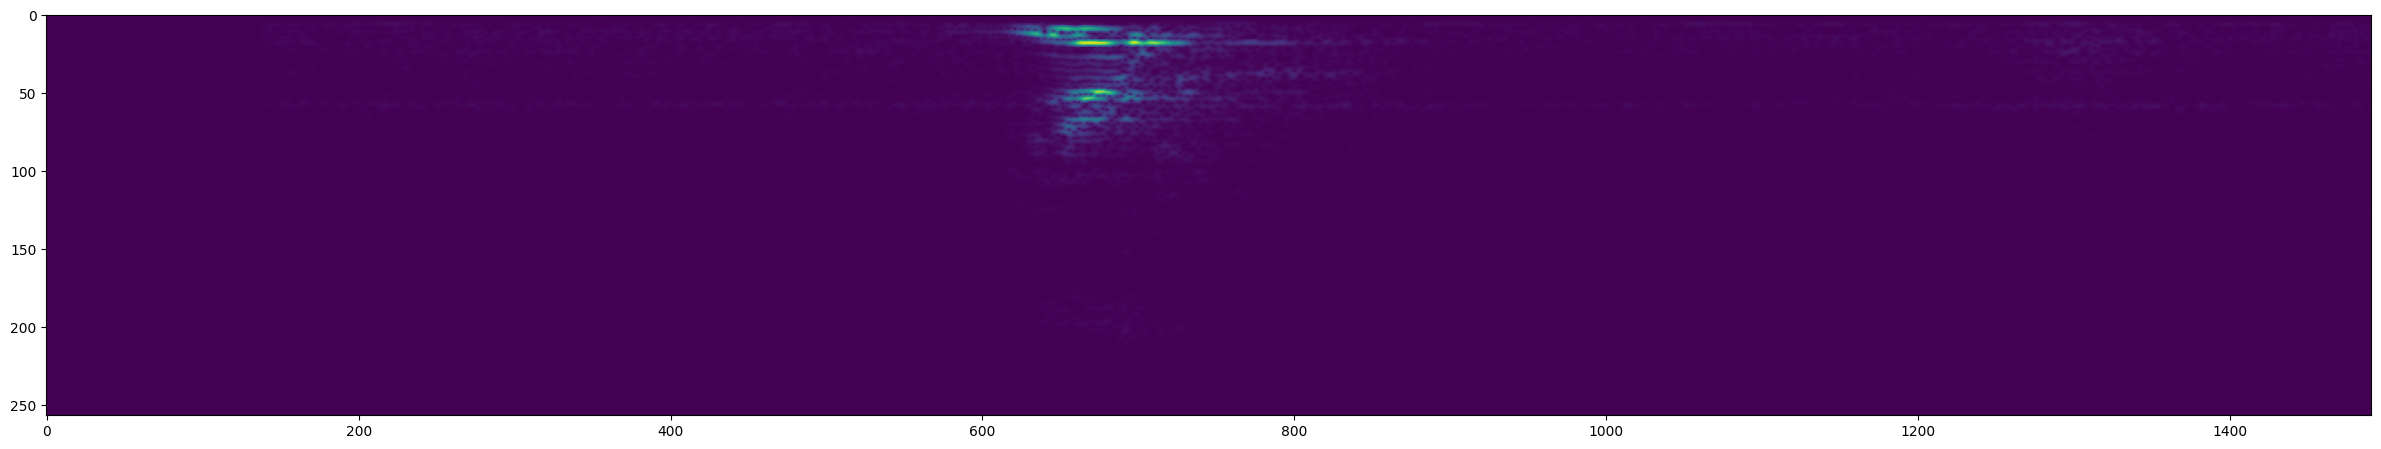

In [52]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

<h2> 6. Create Training and Testing Partitions

<h4> 6.1 Create a Tensorflow Data Pipeline

In [40]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=10000)
data = data.batch(16)
data = data.prefetch(8)

<h4> 6.2 Split into Training and Testing Partitions

In [41]:
len(data)

201

In [42]:
train = data.take(140)
test = data.skip(140).take(61)

<h2>6.3 Test One Batch

<h2>7. Build Deep Learning Model

<h4> 7.1 Load Tensorflow Dependencies

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

<h4> 7.2 Build Sequential Model, Compile and View Summary

In [48]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [49]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 744, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 742, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 371, 62, 16)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 368032)            0         
                                                                 
 dense (Dense)               (None, 128)               4

<h4> 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
# hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4


2023-04-27 09:41:58.479388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype float and shape [719]
	 [[{{node Placeholder/_17}}]]
2023-04-27 09:41:58.479914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [2497]
	 [[{{node Placeholder/_7}}]]
2023-04-27 09:41:58.641297: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3081920512 exceeds 10% of free system memory.
2023-04-27 09:41:59.084367: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3081920512 exceeds 10% of free system memory.
